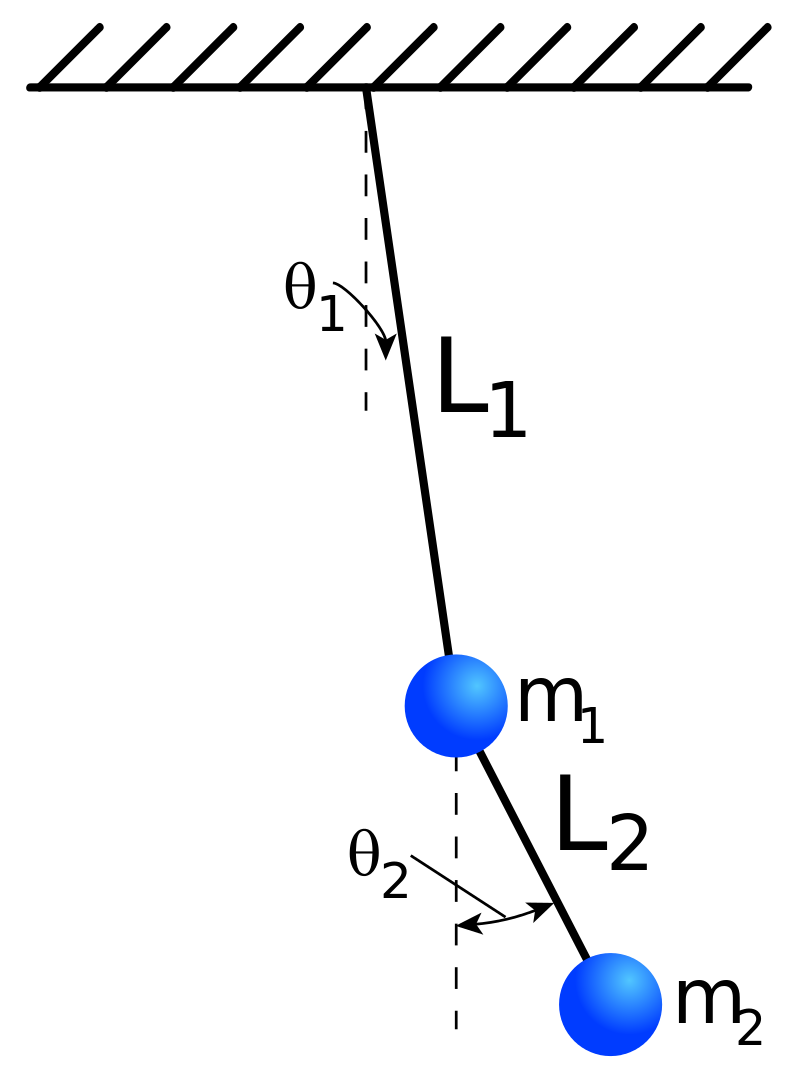

In [3]:
import sympy as smp
from sympy import pi
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib import animation
from IPython.display import HTML
#!pip install -U control
import control as co
#!pip install --upgrade scipy

In [4]:
## all needed symbols
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1, L2')
Cd = smp.symbols('Cd') #Damping factor from Rayleigh’s Dissipation function :
                      #chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/viewer.html?pdfurl=https%3A%2F%2Fweb.mst.edu%2F~stutts%2FSupplementalNotes%2FEL10.pdf&clen=287124&chunk=true
M = smp.symbols("M")
the1, the2 = smp.symbols(r'\theta_1, \theta_2', cls=smp.Function)
the1 = the1(t)
the2 = the2(t)
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

# x1 = L1*smp.sin(the1)
# y1 = -L1*smp.cos(the1)
# x2 = L1*smp.sin(the1)+L2*smp.sin(the2)
# y2 = -L1*smp.cos(the1)-L2*smp.cos(the2)

x1 = L1*smp.sin(the1)     ## this is used to make the pendulum inverted
y1 = L1*smp.cos(the1)     
x2 = L1*smp.sin(the1)+L2*smp.sin(the2)
y2 = L1*smp.cos(the1)+L2*smp.cos(the2)

In [5]:
# Kinetic
T1 = (1/2) * m1 * (smp.diff(x1, t)**2 + smp.diff(y1, t)**2)
T2 = (1/2) * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1+T2
# Potential
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2
# Lagrangian
L = (T-V).simplify()

In [6]:
LE1 = (smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t)-Cd*the1_d).simplify()
LE2 = (smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t)-M-Cd*the2_d).simplify()

In [7]:
LE1

-1.0*Cd*Derivative(\theta_1(t), t) - 1.0*L1**2*m1*Derivative(\theta_1(t), (t, 2)) - 1.0*L1**2*m2*Derivative(\theta_1(t), (t, 2)) - 1.0*L1*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 - 1.0*L1*L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), (t, 2)) + 1.0*L1*g*m1*sin(\theta_1(t)) + 1.0*L1*g*m2*sin(\theta_1(t))

In [8]:
LE2

-1.0*Cd*Derivative(\theta_2(t), t) + 1.0*L1*L2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 - 1.0*L1*L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), (t, 2)) - 1.0*L2**2*m2*Derivative(\theta_2(t), (t, 2)) + 1.0*L2*g*m2*sin(\theta_2(t)) - 1.0*M

In [9]:
sols = smp.solve([LE1, LE2], (the1_dd, the2_dd),
                simplify=True, rational=False)
f1 = sols[the1_dd]
f2 = sols[the2_dd]

In [10]:
f1

(1.0*Cd*L1*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t) - 1.0*Cd*L2*Derivative(\theta_1(t), t) - 0.5*L1**2*L2*m2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_1(t), t)**2 - 1.0*L1*L2**2*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_2(t), t)**2 + 1.0*L1*L2*g*m1*sin(\theta_1(t)) + 0.5*L1*L2*g*m2*sin(\theta_1(t) - 2*\theta_2(t)) + 0.5*L1*L2*g*m2*sin(\theta_1(t)) + 1.0*L1*M*cos(\theta_1(t) - \theta_2(t)))/(L1**2*L2*(m1 - m2*cos(\theta_1(t) - \theta_2(t))**2 + m2))

In [11]:
f2

(-1.0*Cd*L1*m1*Derivative(\theta_2(t), t) - 1.0*Cd*L1*m2*Derivative(\theta_2(t), t) + 1.0*Cd*L2*m2*cos(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t) + 1.0*L1**2*L2*m1*m2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + 1.0*L1**2*L2*m2**2*sin(\theta_1(t) - \theta_2(t))*Derivative(\theta_1(t), t)**2 + 0.5*L1*L2**2*m2**2*sin(2*\theta_1(t) - 2*\theta_2(t))*Derivative(\theta_2(t), t)**2 - 0.5*L1*L2*g*m1*m2*sin(2*\theta_1(t) - \theta_2(t)) + 0.5*L1*L2*g*m1*m2*sin(\theta_2(t)) - 0.5*L1*L2*g*m2**2*sin(2*\theta_1(t) - \theta_2(t)) + 0.5*L1*L2*g*m2**2*sin(\theta_2(t)) - 1.0*L1*M*m1 - 1.0*L1*M*m2)/(L1*L2**2*m2*(m1 - m2*cos(\theta_1(t) - \theta_2(t))**2 + m2))

\begin{align}
\begin{bmatrix}
\dot{\theta_1} \\
\ddot{\theta_1} \\
\dot{\theta_2} \\ 
\ddot{\theta_2} 
\end{bmatrix} 
= 
\begin{bmatrix}
0 & 1 & 0 & 0\\
\frac{\partial f_1}{\partial \theta_1} & \frac{\partial f_1}{\partial \dot{\theta_1}} & \frac{\partial f_1}{\partial \theta_2} & \frac{\partial f_1}{\partial \dot{\theta_2}}\\
0 & 0 & 0 & 1\\
\frac{\partial f_2}{\partial \theta_1} & \frac{\partial f_2}{\partial \dot{\theta_1}} & \frac{\partial f_2}{\partial \theta_2} & \frac{\partial f_2}{\partial \dot{\theta_2}}
\end{bmatrix}
\begin{bmatrix}
\theta_1 \\
\dot{\theta_1} \\
\theta_2 \\ 
\dot{\theta_2} 
\end{bmatrix}
+
\begin{bmatrix}
0 \\
\frac{\partial f_1}{\partial M}\\
0\\ 
\frac{\partial f_2}{\partial M}
\end{bmatrix}.u
\end{align}


In [12]:
Equ_Point1 = {L1:1, L2:1, m1:1, m2:1, the1:0, the2:0, M : 0, the1_d:0, the2_d:0, g: 9.81, Cd:1}

In [13]:
A = smp.Matrix([[0,1,0,0],
                [smp.diff(f1,the1).evalf(subs=Equ_Point1),smp.diff(f1,the1_d).evalf(subs=Equ_Point1),smp.diff(f1,the2).evalf(subs=Equ_Point1),smp.diff(f1,the2_d).evalf(subs=Equ_Point1)],
                [0,0,0,1],
                [smp.diff(f2,the1).evalf(subs=Equ_Point1),smp.diff(f2,the1_d).evalf(subs=Equ_Point1),smp.diff(f2,the2).evalf(subs=Equ_Point1),smp.diff(f2,the2_d).evalf(subs=Equ_Point1)]])
B = smp.Matrix([[0],
                [smp.diff(f1,M).evalf(subs=Equ_Point1)],
                [0],
                [smp.diff(f2,M).evalf(subs=Equ_Point1)]])
C = smp.Matrix([1,0,1,0]).T
D = smp.Matrix([0])

In [14]:
print(A.eigenvals())
A

{4.65964903667585: 1, 2.18222499783186: 1, -2.62155420242235: 1, -7.22031983208537: 1}


Matrix([
[     0,    1,     0,    0],
[ 19.62, -1.0, -9.81,  1.0],
[     0,    0,     0,    1],
[-19.62,  1.0, 19.62, -2.0]])

In [15]:
A.eigenvals()

{-7.22031983208537: 1,
 -2.62155420242235: 1,
 2.18222499783186: 1,
 4.65964903667585: 1}

In [16]:
AB = A*B
A2B = A*AB
A3B = A*A2B
ContMat = B.row_join(AB).row_join(A2B).row_join(A3B)
ContMat.rank()

4

In [17]:
CA = C*A
CA2 = CA*A
CA3 = CA2*A
ObsMat = smp.Matrix([C,CA,CA2,CA3])
ObsMat.rank()

4

In [18]:
A = np.array(A, dtype=float)
B = np.array(B, dtype=float)
C = np.array(C, dtype=float)
D = np.array(D, dtype=float)

In [19]:
State_Space = signal.StateSpace(A, B, C, D)

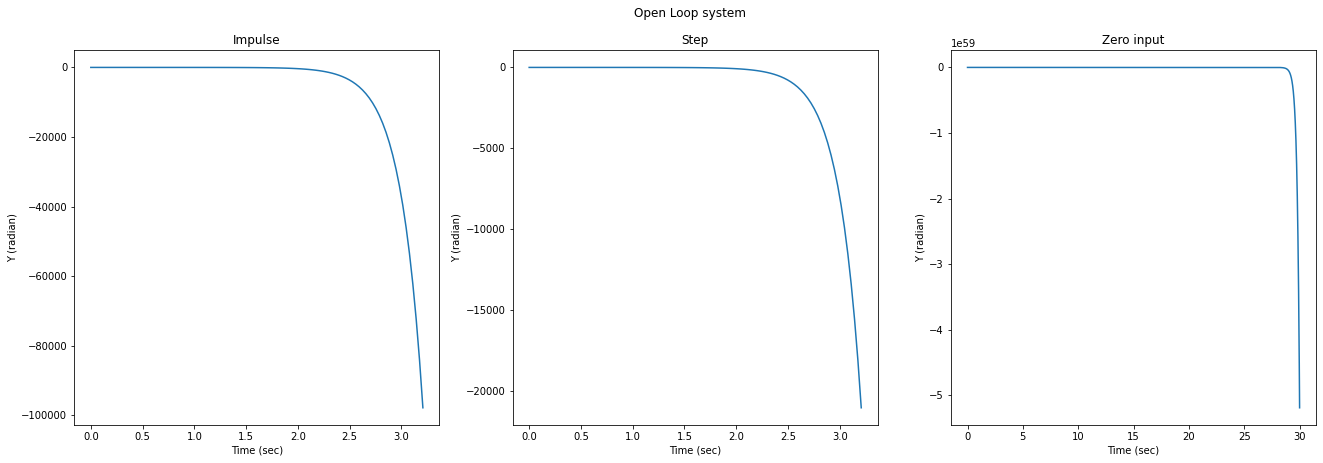

In [20]:
plt.suptitle('Open Loop system',x = 1.55,y=1.55)
plt.subplot(1, 3, 1)
plt.title("Impulse")
t, y = signal.impulse(State_Space)
plt.plot(t, y)
plt.ylabel("Y (radian)")
plt.xlabel("Time (sec)")
plt.subplot(1, 3, 2)
plt.title("Step")
t, y = signal.step(State_Space)
plt.plot(t, y)
plt.xlabel("Time (sec)")
plt.ylabel("Y (radian)")
plt.subplot(1, 3, 3)
plt.title("Zero input")
t = np.linspace(0, 30, num=1000)
u = np.zeros([t.size])
tout, yout, xout = signal.lsim(State_Space, U=u, T=t, X0 = [1,0,0,0])
plt.plot(tout,yout)
plt.xlabel("Time (sec)")
plt.ylabel("Y (radian)")
plt.subplots_adjust(bottom=0.1, right=3, top=1.4)


In [36]:
Control_Poles = 1*np.array([-2+1j,-2+2j,-2-1j,-2-2j])
ControllerGain = signal.place_poles(A, B, Control_Poles, method='YT')
K = -ControllerGain.gain_matrix
np.linalg.eig(A+np.dot(B,K))[0]

array([-2.+2.j, -2.-2.j, -2.+1.j, -2.-1.j])

In [37]:
State_Space2 = signal.StateSpace(A+np.dot(B,K), B, C, 0) ##Closed loop under control law

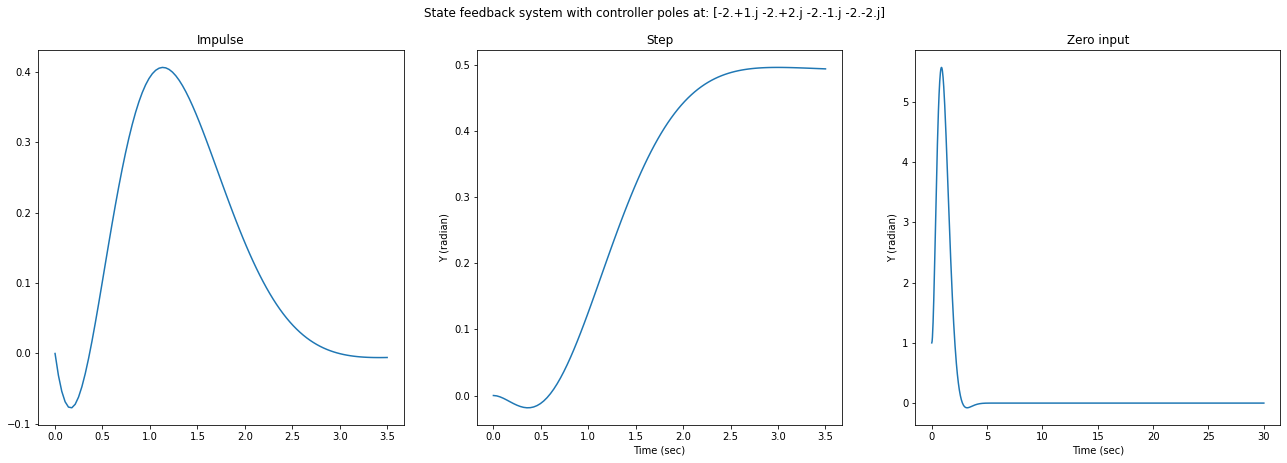

In [38]:
plt.suptitle('State feedback system with controller poles at: '+str(Control_Poles),x = 1.55,y=1.55)
plt.subplot(1, 3, 1)
plt.title("Impulse")
t, y = signal.impulse(State_Space2)
plt.plot(t, y)
plt.subplot(1, 3, 2)
plt.ylabel("Y (radian)")
plt.xlabel("Time (sec)")
plt.title("Step")
t, y = signal.step(State_Space2)
plt.plot(t, y)
plt.ylabel("Y (radian)")
plt.xlabel("Time (sec)")
plt.subplot(1, 3, 3)
plt.title("Zero input")
t = np.linspace(0, 30, num=1000)
u = np.zeros([t.size])
tout, yout, xout = signal.lsim(State_Space2, U=u, T=t, X0 = [1,0,0,0])
plt.plot(tout,yout)
plt.ylabel("Y (radian)")
plt.xlabel("Time (sec)")
plt.subplots_adjust(bottom=0.1, right=3, top=1.4)

**Using A new library Called control**

In [26]:
Control_Poles = 2*np.array([-4,-3,-2,-1])
ControllerGain = signal.place_poles(A, B, Control_Poles, method='YT')
K = -ControllerGain.gain_matrix
np.linalg.eig(A+np.dot(B,K))[0]

array([-8., -6., -4., -2.])

In [27]:
Observer_Poles = 2*np.array([-8,-6,-4,-2])
ObserverGain = signal.place_poles(A.T, -C.T, Observer_Poles, method='YT')
G = -ObserverGain.gain_matrix.T
np.linalg.eig(A-np.dot(G,C))[0]

array([-16., -12.,  -4.,  -8.])

In [28]:
StateSystem = co.ss(A,B,C,D)
Statefeedbacksystem = co.ss(A+np.dot(B,K), B, C, 0)
ObserverSystem = co.ss(A+np.dot(B,K)-np.dot(G,C), G, -K, 0)
ClosedLoopSys = co.feedback(StateSystem, ObserverSystem)

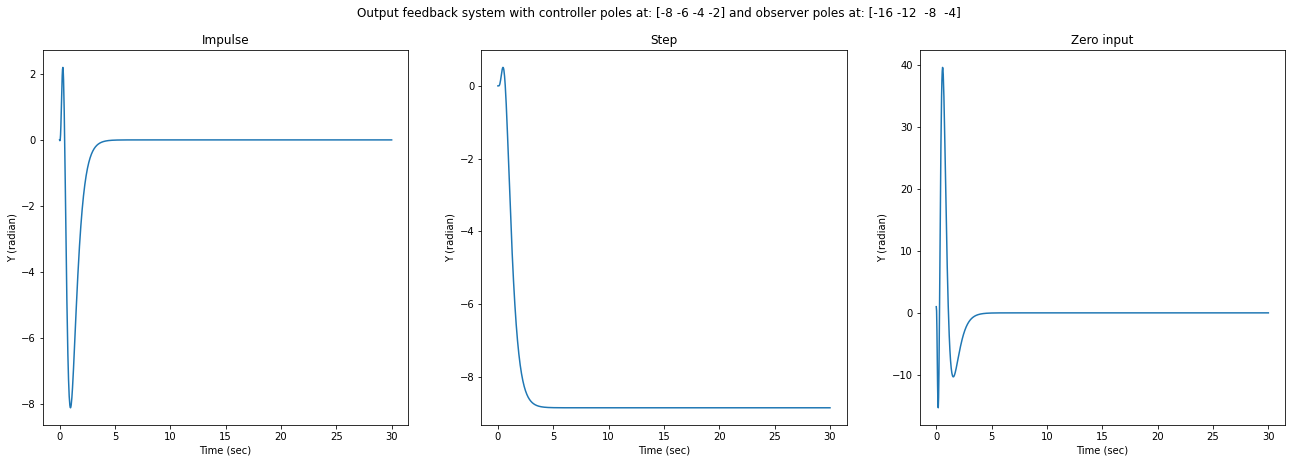

In [29]:
plt.suptitle('Output feedback system with controller poles at: '+str(Control_Poles)+" and observer poles at: "+str(Observer_Poles),x = 1.55,y=1.55)
t = np.linspace(0, 30, num=1000)
plt.subplot(1, 3, 1)
plt.title("Impulse")
t1,y1 = co.impulse_response(ClosedLoopSys,t)
plt.plot(t1, y1)
plt.ylabel("Y (radian)")
plt.xlabel("Time (sec)")
plt.subplot(1, 3, 2)
plt.title("Step")
t1,y1 = co.step_response(ClosedLoopSys,t)
plt.plot(t1, y1)
plt.ylabel("Y (radian)")
plt.xlabel("Time (sec)")
plt.subplot(1, 3, 3)
plt.title("Zero input")
t1,y1 = co.initial_response(ClosedLoopSys,t,[1,0,0,0,0,0,0,0])
plt.plot(t1,y1)
plt.ylabel("Y (radian)")
plt.xlabel("Time (sec)")
plt.subplots_adjust(bottom=0.1, right=3, top=1.4)

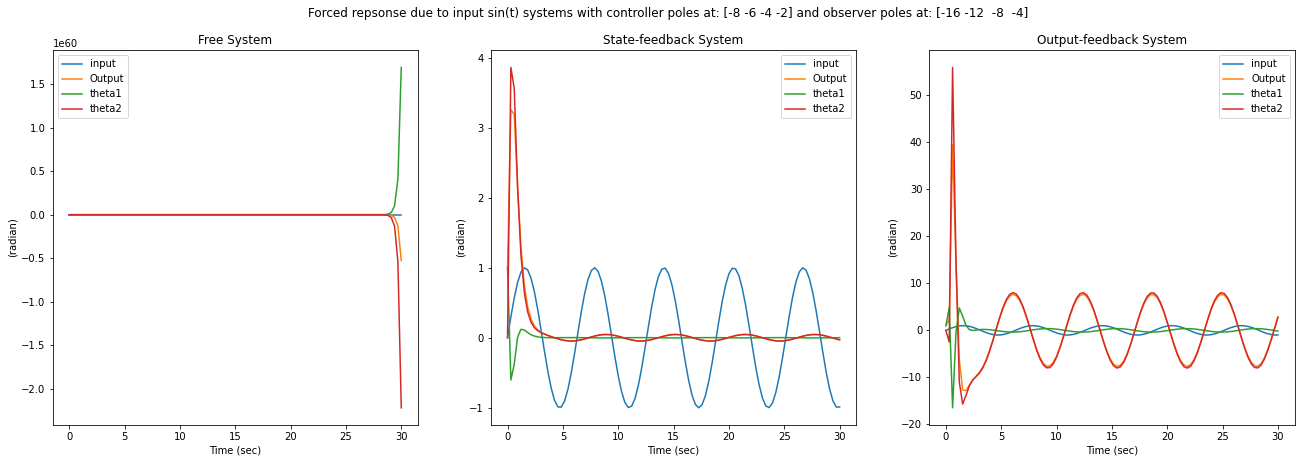

In [30]:
plt.suptitle('Forced repsonse due to input sin(t) systems with controller poles at: '+str(Control_Poles)+" and observer poles at: "+str(Observer_Poles),x = 1.55,y=1.55)
t = np.linspace(0, 30, num=100)
u = np.sin(t)

plt.subplot(1, 3, 1)
plt.title("Free System")
t1, y1, states = co.forced_response(StateSystem, t, u, [1,0,0,0], return_x= True)
plt.plot(t1,u, label="input")
plt.plot(t1,y1, label="Output")
plt.plot(t1,states[0], label = "theta1")
plt.plot(t1,states[2], label = "theta2")
plt.legend()
plt.ylabel("(radian)")
plt.xlabel("Time (sec)")

plt.subplot(1, 3, 2)
plt.title("State-feedback System")
t1, y1, states = co.forced_response(Statefeedbacksystem, t, u, [1,0,0,0], return_x= True)
plt.plot(t1,u, label="input")
plt.plot(t1,y1, label="Output")
plt.plot(t1,states[0], label = "theta1")
plt.plot(t1,states[2], label = "theta2")
plt.legend()
plt.ylabel("(radian)")
plt.xlabel("Time (sec)")

plt.subplot(1, 3, 3)
plt.title("Output-feedback System")
t1, y1, states = co.forced_response(ClosedLoopSys, t, u, [1,0,0,0,0,0,0,0], return_x= True)
plt.plot(t1,u, label="input")
plt.plot(t1,y1, label="Output")
plt.plot(t1,states[0], label = "theta1")
plt.plot(t1,states[2], label = "theta2")
plt.legend()
plt.ylabel("(radian)")
plt.xlabel("Time (sec)")
plt.subplots_adjust(bottom=0.1, right=3, top=1.4)

Text(0.5, 0, 'Time (sec)')

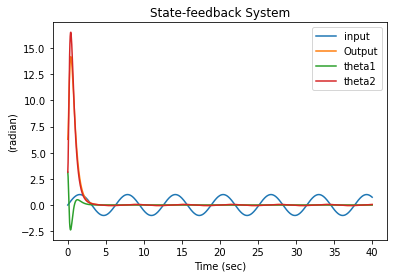

In [31]:
t = np.linspace(0, 40, 1001)
u = np.sin(t)
plt.title("State-feedback System")
t1, y1, states = co.forced_response(Statefeedbacksystem, t, u, [np.pi,0,np.pi,0], return_x= True)
plt.plot(t1,u, label="input")
plt.plot(t1,y1, label="Output")
plt.plot(t1,states[0], label = "theta1")
plt.plot(t1,states[2], label = "theta2")
plt.legend()
plt.ylabel("(radian)")
plt.xlabel("Time (sec)")

In [32]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
            L1*np.cos(the1),
            L1*np.sin(the1) + L2*np.sin(the2),
            L1*np.cos(the1) + L2*np.cos(the2))

x1, y1, x2, y2 = get_x1y1x2y2(t, states[0], states[2], 2, 2)

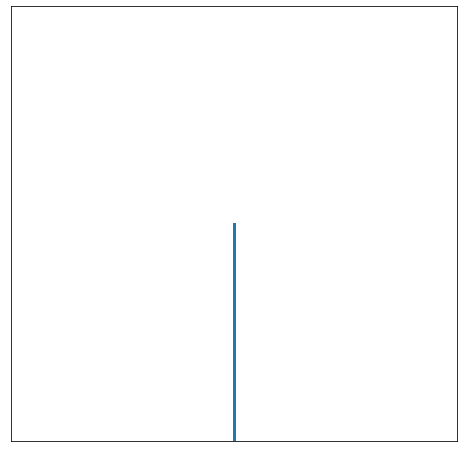

In [33]:
def animate(i):
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])  
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
#ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
HTML(ani.to_html5_video())